In [22]:

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg

# data = pd.read_csv('fifa21_train.csv')
# dummy = data.head(5)
# dummy

In [30]:
# def clean_fifa21(df):
#     cols = []
#     for i in range(len(df.columns)):
#         cols.append(df.columns[i].lower().replace(' ', '_'))
#     df.columns = cols
#     df_num = df._get_numeric_data()
#     df_num = df_num[df_num['volleys'].isna()==False]
#     df_num = df_num[df_num['composure'].isna()==False]
#     list_dummies = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',]
#     for col in df[list_dummies]:
#         df[col] = df[col].str.split("+", n = 1, expand = True)[0]
#     dummies_2 = ['w/f','sm','ir']
#     for col in df[dummies_2]:
#         df[col] = df[col].str.split(" ", n = 1, expand = True)[0]
#     valid_columns = ['age','bp','height','weight','foot','growth','value','attacking','skill','movement','power','mentality','defending','goalkeeping','base_stats','w/f','sm','a/w','d/w','ir','pac','sho','pas','dri','defe','phy','hits','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk']
#     from sklearn.preprocessing import LabelEncoder
#     label_encoded = LabelEncoder().fit(df['foot']).transform(df['foot']) # ordered wrt value counts
#     label_encoded = pd.DataFrame(label_encoded)
#     # label_encoded['foot'].value_counts()
#     df['foot']= label_encoded
#     for col in df['weight']:
#         df['weight'] = df['weight'].str.split("lbs", n = 1, expand = True)[0]
#     #A/W
#     label_encoded = LabelEncoder().fit(df['a/w']).transform(df['a/w']) # ordered wrt value counts
#     label_encoded = pd.DataFrame(label_encoded)
#     # label_encoded['foot'].value_counts()
#     df['a/w']= label_encoded
#     #D/W
#     df4 = df['d/w']
#     label_encoded = LabelEncoder().fit(df['d/w']).transform(df['d/w']) # ordered wrt value counts
#     label_encoded = pd.DataFrame(label_encoded)
#     # label_encoded['foot'].value_counts()
#     df['d/w'] = label_encoded
#     df['value'] = df['value'].str.replace("€", "").str.replace("K","000").str.replace("M","000000").str.replace("B","000000000")
#     #coding bp
#     label_encoded = LabelEncoder().fit(df['bp']).transform(df['bp'])
#     label_encoded = pd.DataFrame(label_encoded)
#     df['bp'] = label_encoded
#     for col in df['height']:
#         data_height_ft = df['height'].str.split("\'", n = 1, expand = True)[0]
#         data_height_in_1 = df['height'].str.split("\'", n = 1, expand = True)[1]
#     for i in data_height_in_1:
#         data_height_in_2 = i.rstrip("\"")
#     height_ft = pd.to_numeric(data_height_ft)
#     height_in_2 = pd.to_numeric(data_height_in_2)
#     df['height'] = (height_ft * 30.48)  + (height_in_2 * 2.54)
#     return df

In [ ]:
# clean_fifa21(data)

# we start with data claned "manually" as the function tales too long due to too many for loops and the size of the data

In [4]:
clean_data = pd.read_csv('clean_data.csv')

/Users/chrislacarte/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


columns out to make heatmap readable 'bp','heigth', 'weigth','value','w/f','sm','a/w','d/w','ir','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',

In [23]:




valid_columns = ['age','foot','growth','attacking','skill','movement','power','mentality','defending','goalkeeping','base_stats','pac','sho','pas','dri','phy','ova']






We leave out 'defe' and 'hits' as "they are too big for float"

In [24]:
#there were space on the 'defe' and 'hit' column and they were still strings, we eliminate odd chars and covert to numeric:
fifa = clean_data[valid_columns]
# fifa['defe'] = fifa['defe'].replace(" ", "")

# fifa['defe'] = pd.to_numeric(fifa['defe'])
# fifa['hits'] = fifa['hits'].str.replace("K", "")
# fifa['hits'] = pd.to_numeric(fifa['hits'])
# fifa['hits']
fifa.dtypes

age            int64
foot           int64
growth         int64
attacking      int64
skill          int64
movement       int64
power          int64
mentality      int64
defending      int64
goalkeeping    int64
base_stats     int64
pac            int64
sho            int64
pas            int64
dri            int64
phy            int64
ova            int64
dtype: object

In [25]:
correlations_matrix = fifa.corr()
correlations_matrix

age      foot    growth  attacking     skill  movement  \
age          1.000000  0.014945 -0.854136   0.191137  0.175981 -0.051802   
foot         0.014945  1.000000  0.008409  -0.084806 -0.131803 -0.102549   
growth      -0.854136  0.008409  1.000000  -0.281668 -0.262893 -0.101370   
attacking    0.191137 -0.084806 -0.281668   1.000000  0.928584  0.692493   
skill        0.175981 -0.131803 -0.262893   0.928584  1.000000  0.725776   
movement    -0.051802 -0.102549 -0.101370   0.692493  0.725776  1.000000   
power        0.314169 -0.024835 -0.427800   0.823527  0.753061  0.560489   
mentality    0.278804 -0.086075 -0.348028   0.888604  0.885893  0.610661   
defending    0.117902 -0.109072 -0.157743   0.311367  0.370432  0.174070   
goalkeeping  0.120656  0.098895 -0.050320  -0.769826 -0.716263 -0.563037   
base_stats   0.417633 -0.041586 -0.516137   0.425923  0.499657  0.450295   
pac         -0.176232 -0.058729  0.019677   0.181119  0.217046  0.705488   
sho          0.311175  0.052458 -0.334891   0.349931  0.325009  0.227513   
pas          0.402361 -0.055750 -0.439781   0.370180  0.514101  0.307423   
dri          0.242675 -0.039937 -0.320569   0.379978  0.486271  0.497619   
phy          0.434448  0.052788 -0.484123   0.107896  0.031079 -0.111590   
ova          0.519799 -0.022588 -0.596642   0.433092  0.442666  0.304496   

                power  mentality  defending  goalkeeping  base_stats  \
age          0.314169   0.278804   0.117902     0.120656    0.417633   
foot        -0.024835  -0.086075  -0.109072     0.098895   -0.041586   
growth      -0.427800  -0.348028  -0.157743    -0.050320   -0.516137   
attacking    0.823527   0.888604   0.311367    -0.769826    0.425923   
skill        0.753061   0.885893   0.370432    -0.716263    0.499657   
movement     0.560489   0.610661   0.174070    -0.563037    0.450295   
power        1.000000   0.823428   0.361816    -0.573683    0.573182   
mentality    0.823428   1.000000   0.587906    -0.727656    0.515576   
defending    0.361816   0.587906   1.000000    -0.496275    0.221140   
goalkeeping -0.573683  -0.727656  -0.496275     1.000000    0.097712   
base_stats   0.573182   0.515576   0.221140     0.097712    1.000000   
pac          0.157692   0.065620  -0.213725    -0.004254    0.439814   
sho          0.374796   0.186766  -0.485337     0.246624    0.617893   
pas          0.355994   0.408774   0.061623     0.171304    0.850402   
dri          0.332691   0.308240  -0.205621     0.160553    0.801646   
phy          0.519953   0.312193   0.388696     0.062021    0.491160   
ova          0.547839   0.494590   0.243725     0.038584    0.834331   

                  pac       sho       pas       dri       phy       ova  
age         -0.176232  0.311175  0.402361  0.242675  0.434448  0.519799  
foot        -0.058729  0.052458 -0.055750 -0.039937  0.052788 -0.022588  
growth       0.019677 -0.334891 -0.439781 -0.320569 -0.484123 -0.596642  
attacking    0.181119  0.349931  0.370180  0.379978  0.107896  0.433092  
skill        0.217046  0.325009  0.514101  0.486271  0.031079  0.442666  
movement     0.705488  0.227513  0.307423  0.497619 -0.111590  0.304496  
power        0.157692  0.374796  0.355994  0.332691  0.519953  0.547839  
mentality    0.065620  0.186766  0.408774  0.308240  0.312193  0.494590  
defending   -0.213725 -0.485337  0.061623 -0.205621  0.388696  0.243725  
goalkeeping -0.004254  0.246624  0.171304  0.160553  0.062021  0.038584  
base_stats   0.439814  0.617893  0.850402  0.801646  0.491160  0.834331  
pac          1.000000  0.305295  0.248108  0.523442 -0.121209  0.206624  
sho          0.305295  1.000000  0.651772  0.764479  0.057520  0.492019  
pas          0.248108  0.651772  1.000000  0.820455  0.177747  0.703290  
dri          0.523442  0.764479  0.820455  1.000000  0.026681  0.646678  
phy         -0.121209  0.057520  0.177747  0.026681  1.000000  0.542485  
ova          0.206624  0.492019  0.703290  0.646678  0.542485  1.000000

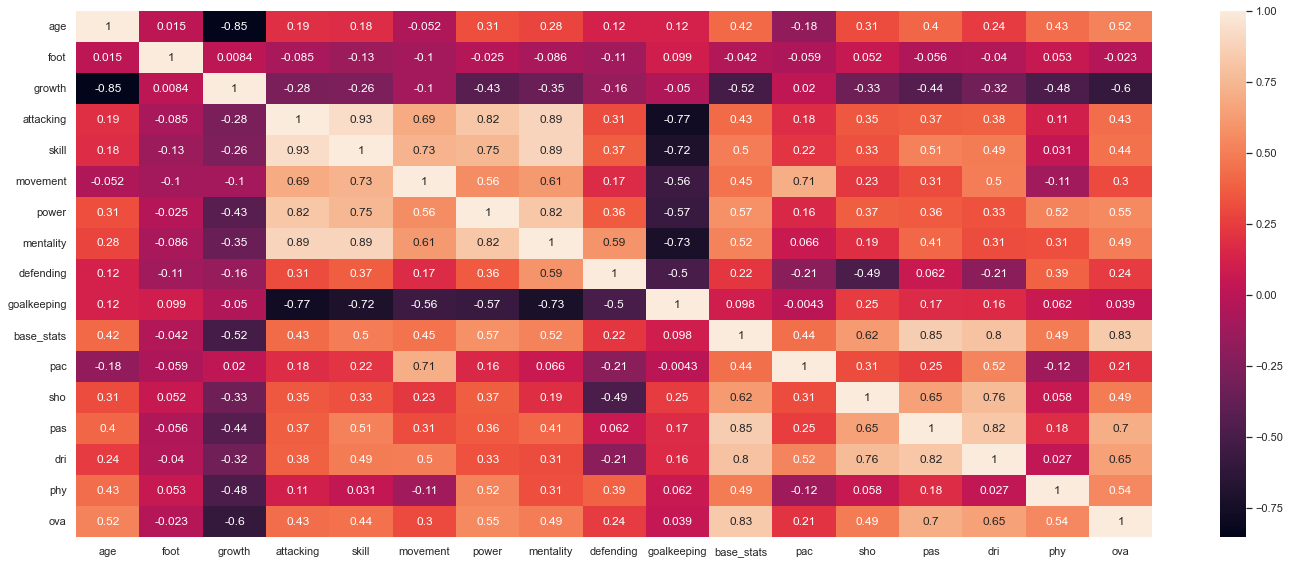

In [32]:
sns.heatmap(correlations_matrix, annot=True)
sns.set(rc = {'figure.figsize':(25,10)})
plt.rcParams["figure.autolayout"] = True
plt.show()

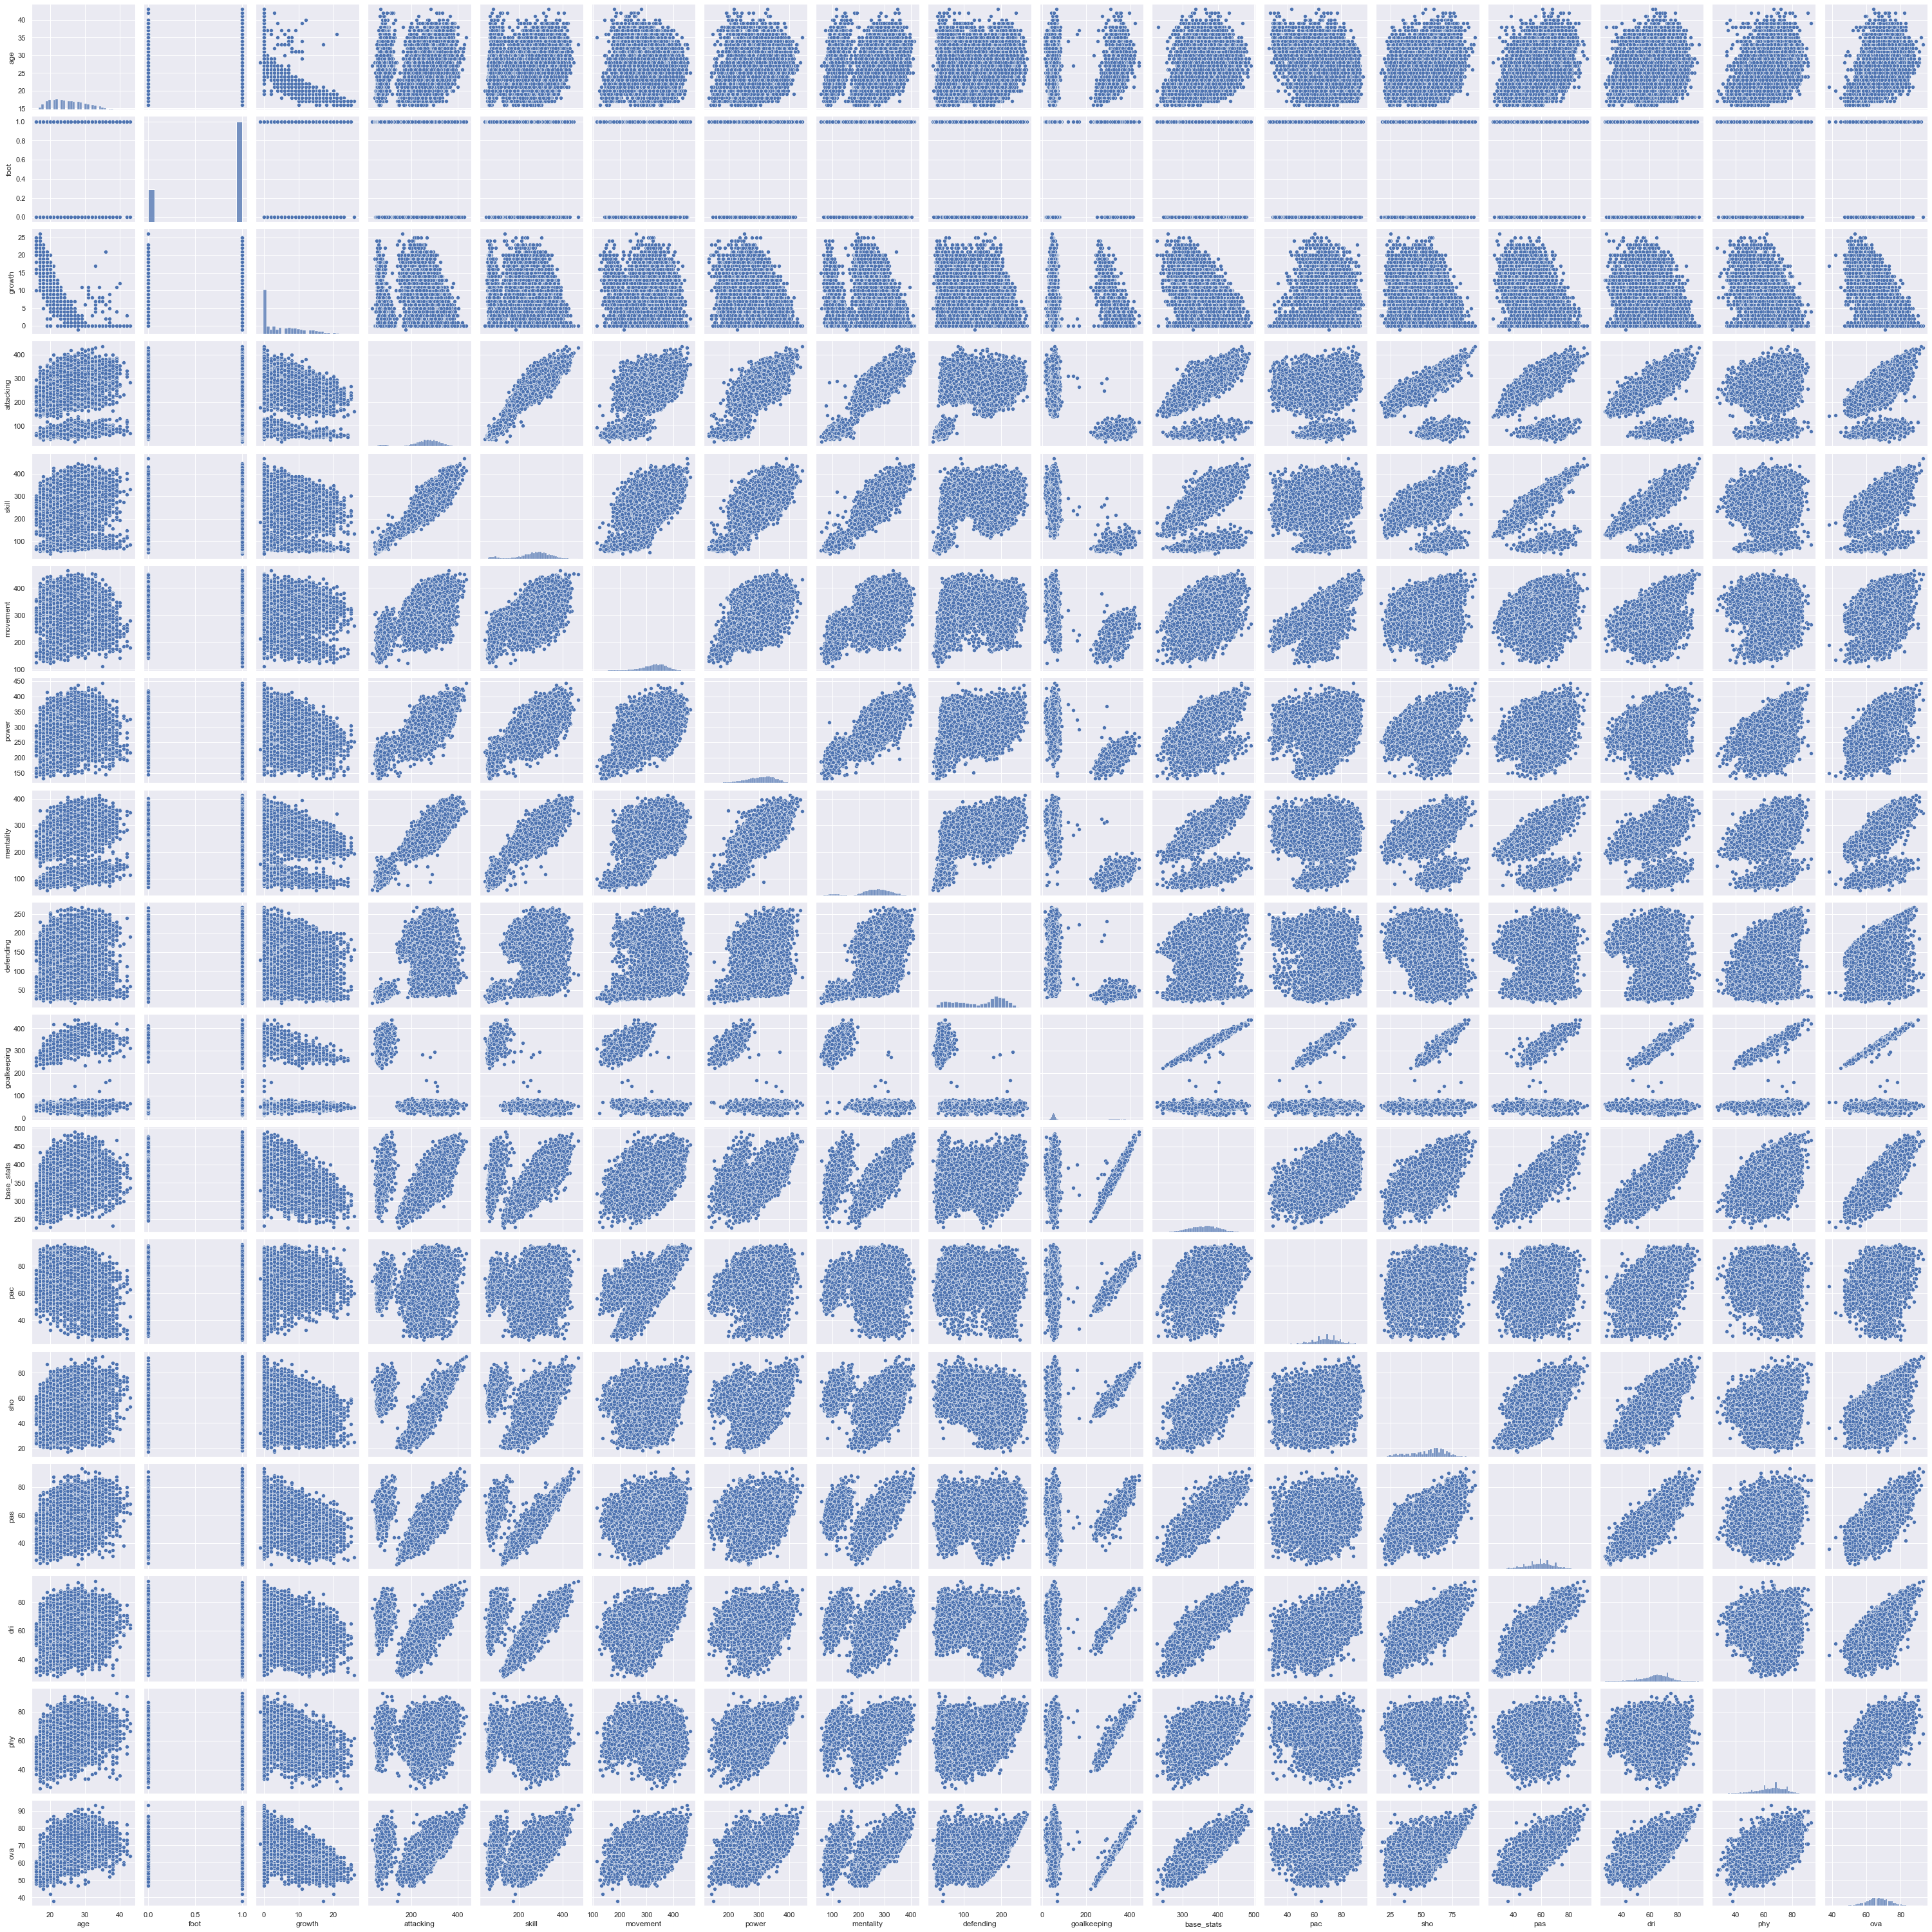

In [38]:
sns.pairplot(fifa)

In [40]:
reduced_data = fifa.drop(['attacking','skill','movement','power'],axis=1)
reduced_data.columns



Index(['age', 'foot', 'growth', 'mentality', 'defending', 'goalkeeping',
       'base_stats', 'pac', 'sho', 'pas', 'dri', 'phy', 'ova'],
      dtype='object')

x, y split 

In [41]:
y = reduced_data['ova']         # Choosing 'y'="ova" as my target
X2 = reduced_data.drop(['ova'], axis=1) #all data except the 'ova'

lm2 = linear_model.LinearRegression()
lm2.fit(X2,y)
print("R2-score is:",lm2.score(X2,y))
y_pred = lm2.predict(X2)
print("MSE is :",mean_squared_error(y_pred,y))
#results are better, but now we cannot visualize them

R2-score is: 0.7714001501682128
MSE is : 10.80738975008464


In [42]:
reduced_data

age  foot  growth  mentality  defending  goalkeeping  base_stats  pac  \
0       26     1       1        290        148           48         357   69   
1       30     1       0        313         77           55         412   83   
2       33     1       0        332         80           21         404   80   
3       22     1      13        257        168           42         329   57   
4       23     1       8        294        185           52         360   66   
...    ...   ...     ...        ...        ...          ...         ...  ...   
11696   25     0       5        266        184           61         347   75   
11697   27     1       4        101         41          347         387   72   
11698   22     1       8        241         62           57         337   76   
11699   26     1       7        241        113           81         400   72   
11700   22     0       9        244         56           48         336   79   

       sho  pas  dri  phy  ova  
0       51   63   63   60   64  
1       75   68   82   71   77  
2       77   78   86   56   80  
3       44   54   57   60   59  
4       44   60   64   66   65  
...    ...  ...  ...  ...  ...  
11696   28   56   59   69   65  
11697   67   66   72   70   70  
11698   60   60   72   43   67  
11699   63   70   72   66   68  
11700   62   56   67   48   64  

[11701 rows x 13 columns]

In [44]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(reduced_data)
x_normalized = transformer.transform(reduced_data)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=reduced_data.columns)

(11701, 13)


age  foot    growth  mentality  defending  goalkeeping  \
0      0.370370   1.0  0.074074   0.654596      0.524     0.084309   
1      0.518519   1.0  0.037037   0.718663      0.240     0.100703   
2      0.629630   1.0  0.037037   0.771588      0.252     0.021077   
3      0.222222   1.0  0.518519   0.562674      0.604     0.070258   
4      0.259259   1.0  0.333333   0.665738      0.672     0.093677   
...         ...   ...       ...        ...        ...          ...   
11696  0.333333   0.0  0.222222   0.587744      0.668     0.114754   
11697  0.407407   1.0  0.185185   0.128134      0.096     0.784543   
11698  0.222222   1.0  0.333333   0.518106      0.180     0.105386   
11699  0.370370   1.0  0.296296   0.518106      0.384     0.161593   
11700  0.222222   0.0  0.370370   0.526462      0.156     0.084309   

       base_stats       pac       sho       pas       dri       phy       ova  
0        0.492366  0.614286  0.447368  0.558824  0.522388  0.500000  0.472727  
1        0.702290  0.814286  0.763158  0.632353  0.805970  0.666667  0.709091  
2        0.671756  0.771429  0.789474  0.779412  0.865672  0.439394  0.763636  
3        0.385496  0.442857  0.355263  0.426471  0.432836  0.500000  0.381818  
4        0.503817  0.571429  0.355263  0.514706  0.537313  0.590909  0.490909  
...           ...       ...       ...       ...       ...       ...       ...  
11696    0.454198  0.700000  0.144737  0.455882  0.462687  0.636364  0.490909  
11697    0.606870  0.657143  0.657895  0.602941  0.656716  0.651515  0.581818  
11698    0.416031  0.714286  0.565789  0.514706  0.656716  0.242424  0.527273  
11699    0.656489  0.657143  0.605263  0.661765  0.656716  0.590909  0.545455  
11700    0.412214  0.757143  0.592105  0.455882  0.582090  0.318182  0.472727  

[11701 rows x 13 columns]

In [46]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
# # Applying linear regression

linreg=LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg=linreg.predict(X_test) 

In [50]:
predictions_test = lm.predict(X_test)
#r2_score(y_test, predictions_test)

In [51]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions_test))

3.1202509129335705

In [52]:
y_test.mean()


66.91328492097394